In [122]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [134]:
#Read dataset 
who = pd.read_csv('C:\\Users\\TejYadav\\Desktop\\watson\\AnalyticsVidhya\\UNCOVER COVID-19 Challenge\\who-situation-reports-covid-19.csv') # From local disk
#train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv') # from Kaggle
who.head()

,reported_date,reporting_country_territory,province_city,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,transmission_classification,total_cases_with_travel_history_to_china,new_cases_with_travel_history_to_china,...,daily_clinically_diagnosed_cases,daily_total_cases,cumulative_total_cases,cumulative_lab_confirmed_cases,cumulative_clinically_diagnosed_cases,cumulative_deaths,days_since_last_reported,who_region,population,report_url
0,2020-03-31,China,NaN,82447,106.0,3310.0,4.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
1,2020-03-31,Republic of Korea,NaN,9661,78.0,158.0,6.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
2,2020-03-31,Australia,NaN,3966,0.0,16.0,0.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
3,2020-03-31,Malaysia,NaN,2470,150.0,34.0,7.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
4,2020-03-31,Japan,NaN,1866,173.0,54.0,2.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...


In [135]:
# Check Data types
who.dtypes

reported_date                                                         object
reporting_country_territory                                           object
province_city                                                         object
confirmed_cases                                                       object
new_confirmed_cases                                                  float64
total_deaths                                                         float64
new_total_deaths                                                     float64
transmission_classification                                           object
total_cases_with_travel_history_to_china                             float64
new_cases_with_travel_history_to_china                               float64
total_cases_with_possible_or_confirmed_transmission_outside_china     object
new_cases_with_possible_or_confirmed_transmission_outside_china      float64
total_cases_with_site_of_transmission_under_investigation            float64

In [136]:
# Check if any duplicates
duplicate_rows_df = who[who.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 33)


In [137]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   reported_date                                                      6744 non-null   object 
 1   reporting_country_territory                                        6744 non-null   object 
 2   province_city                                                      1547 non-null   object 
 3   confirmed_cases                                                    6744 non-null   object 
 4   new_confirmed_cases                                                6029 non-null   float64
 5   total_deaths                                                       6109 non-null   float64
 6   new_total_deaths                                                   5980 non-null   float64
 7   transmission_classificat

In [138]:
# If any null values (as per dataset only Province/State shows null)
who.isnull().sum()

reported_date                                                           0
reporting_country_territory                                             0
province_city                                                        5197
confirmed_cases                                                         0
new_confirmed_cases                                                   715
total_deaths                                                          635
new_total_deaths                                                      764
transmission_classification                                          2413
total_cases_with_travel_history_to_china                             6345
new_cases_with_travel_history_to_china                               6404
total_cases_with_possible_or_confirmed_transmission_outside_china    6345
new_cases_with_possible_or_confirmed_transmission_outside_china      6406
total_cases_with_site_of_transmission_under_investigation            6624
new_cases_with_site_of_transmission_un

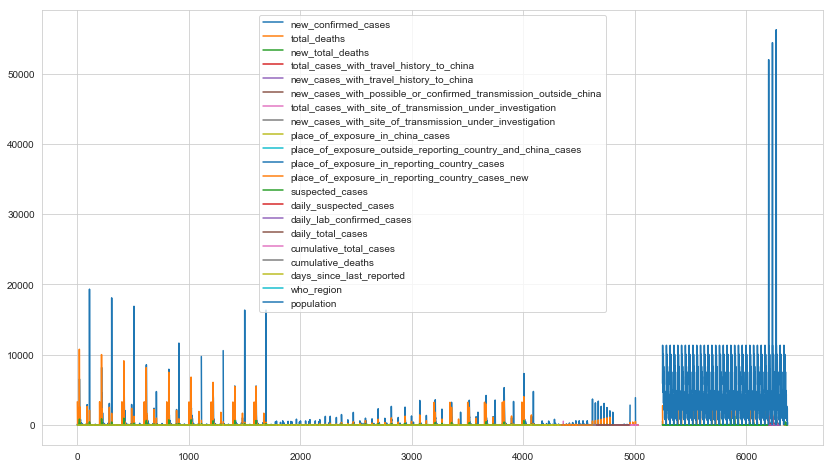

In [141]:
who.plot(figsize=(14,8))

In [47]:
# Groupby Country/ confirmesCases and Fatalities
countries = train.groupby('Country/Region')['ConfirmedCases','Fatalities'].sum().sort_values(by='Country/Region',ascending=False)

C:\Users\TejYadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [48]:
countries

,ConfirmedCases,Fatalities
Country/Region,,
Zambia,11.0,0.0
Vietnam,1439.0,0.0
Venezuela,322.0,0.0
Uzbekistan,174.0,0.0
Uruguay,513.0,0.0
...,...,...
Antigua and Barbuda,10.0,0.0
Andorra,423.0,1.0
Algeria,991.0,77.0


Text(0.5,1,'Country/Region wise')

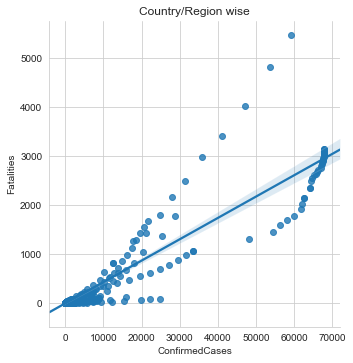

In [55]:
sns.lmplot(x='ConfirmedCases', y = 'Fatalities', data = train)
plt.title('Country/Region wise')

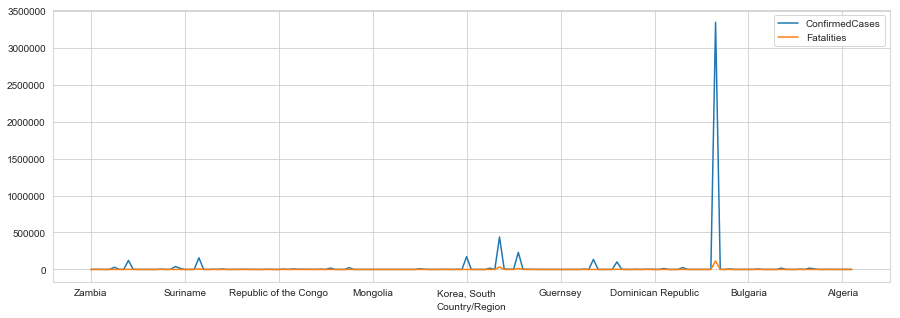

In [53]:
# Plot to check ConfirmedCases and Fatalities
countries.plot(legend=True,figsize=(15,5))
plt.show()

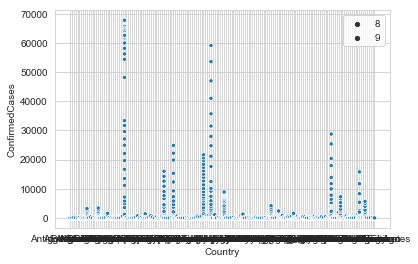

In [76]:
# Graph to show top confirmed cases by top countries
top_countries = countries.index[:10]
df_top_countries = train[train['Country'].isin(top_countries)]
ax = sns.scatterplot(x="Country", y="ConfirmedCases", size=9, data=train)

In [59]:
train.columns

Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')

In [60]:
train.rename(columns = {'Province/State':'State', 'Country/Region':'Country'}, inplace = True) 

In [61]:
train = train.drop(columns = {'State'})

In [62]:
train.head()

,Id,Country,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


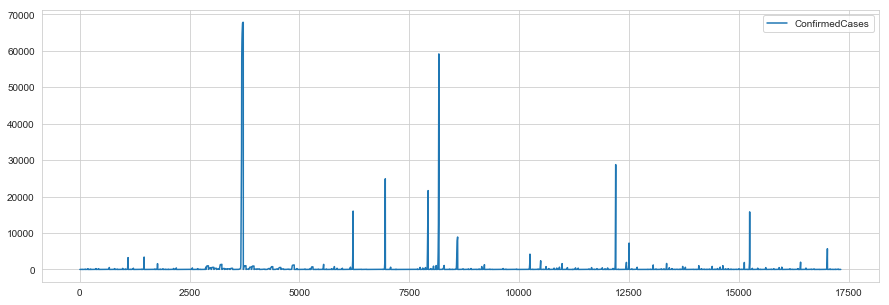

In [63]:
# Plot to show Confirmed cases
train['ConfirmedCases'].plot(legend=True,figsize=(15,5))
plt.show()

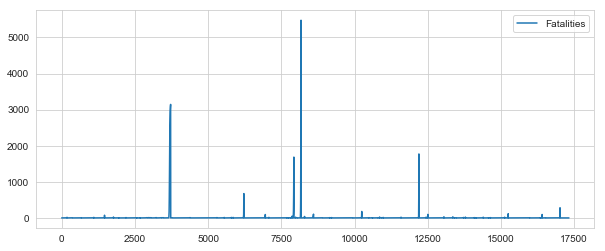

In [142]:
# Plot to show Fatalities
df['Fatalities'].plot(legend=True,figsize=(10,4))
plt.show()

In [65]:
train.shape

(17324, 7)

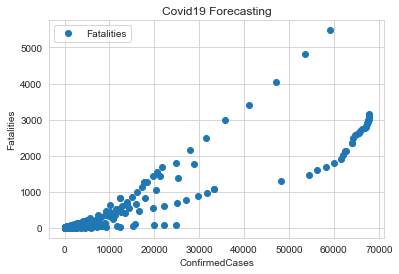

In [67]:
train.plot(x='ConfirmedCases', y='Fatalities', style='o')  
plt.title('Covid19 Forecasting')  
plt.xlabel('ConfirmedCases')  
plt.ylabel('Fatalities')  
plt.show()

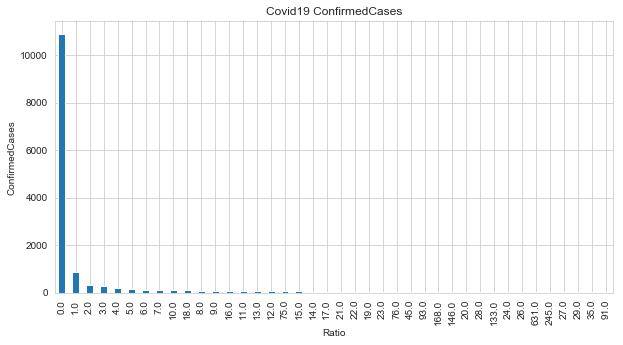

In [68]:
# Plot to check Confirmed cases by Country
train.ConfirmedCases.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");

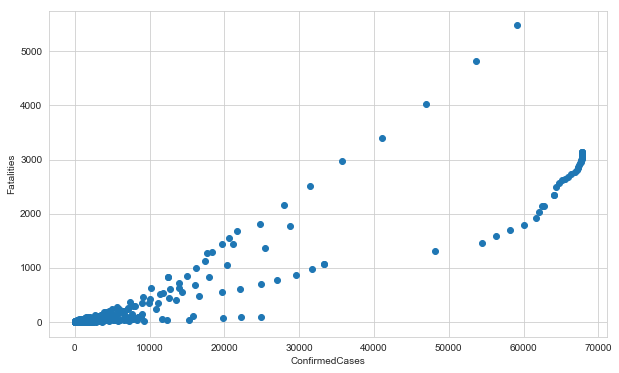

In [69]:
# Plotting a scatter plot between Confirmed Cases vs Fatalities
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train['ConfirmedCases'], train['Fatalities'])
ax.set_xlabel('ConfirmedCases')
ax.set_ylabel('Fatalities')
plt.show()

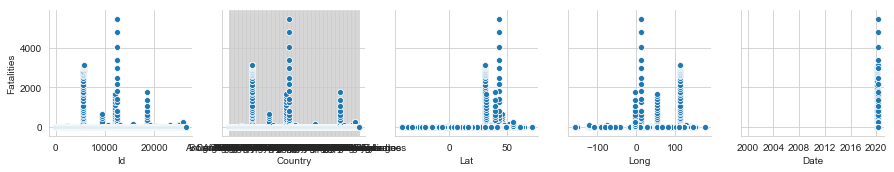

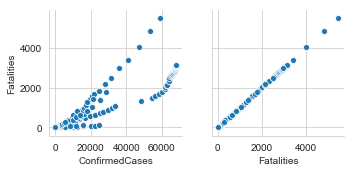

In [70]:
# Pairplot to check for all Fatalities vs all
for i in range(0, len(train.columns), 5):
    sns.pairplot(train, x_vars=train.columns[i:i+5],
                y_vars=['Fatalities'])

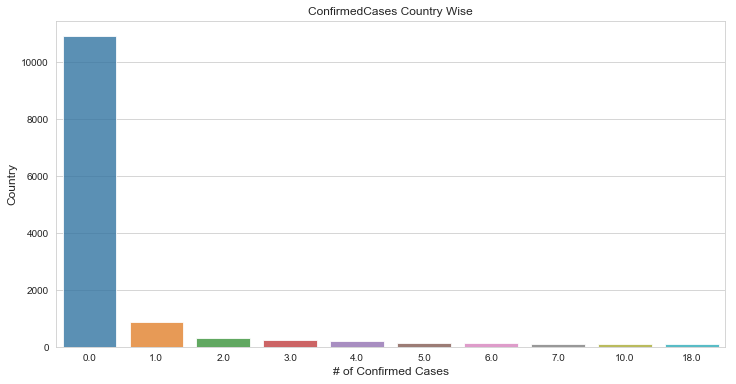

In [71]:
# number of Confirmed cases per Country
x=train.groupby(['ConfirmedCases', 'Fatalities']).count()
x=x.sort_values(by='Country',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(12,6))
ax= sns.barplot(x.ConfirmedCases, x.Country, alpha=0.8)
plt.title("ConfirmedCases Country Wise")
plt.xlabel('# of Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [88]:
train.columns

Index(['Id', 'Country', 'Lat', 'Long', 'Date', 'ConfirmedCases', 'Fatalities'], dtype='object')

In [90]:
countries.head()

,ConfirmedCases,Fatalities
Country/Region,,
Zambia,11.0,0.0
Vietnam,1439.0,0.0
Venezuela,322.0,0.0
Uzbekistan,174.0,0.0
Uruguay,513.0,0.0


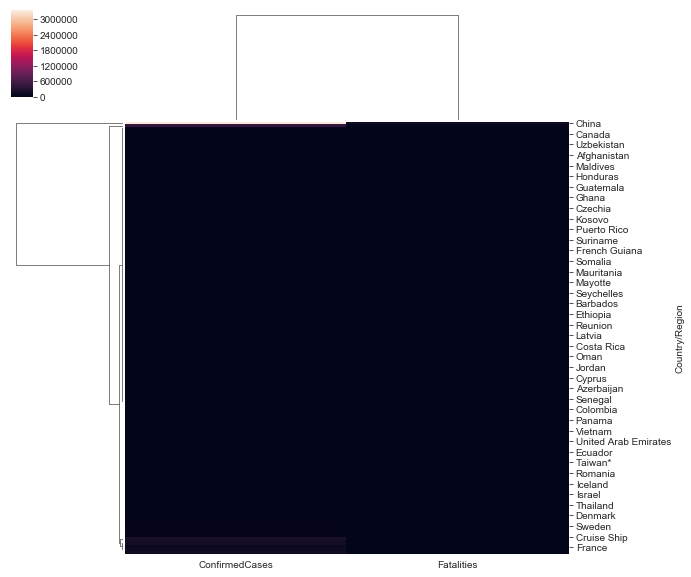

In [99]:
sns.clustermap(countries)

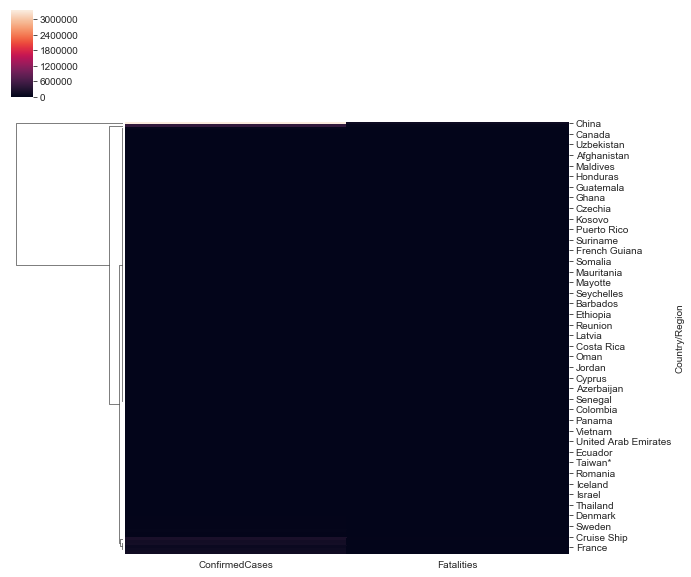

In [100]:
sns.clustermap(countries,col_cluster=False)

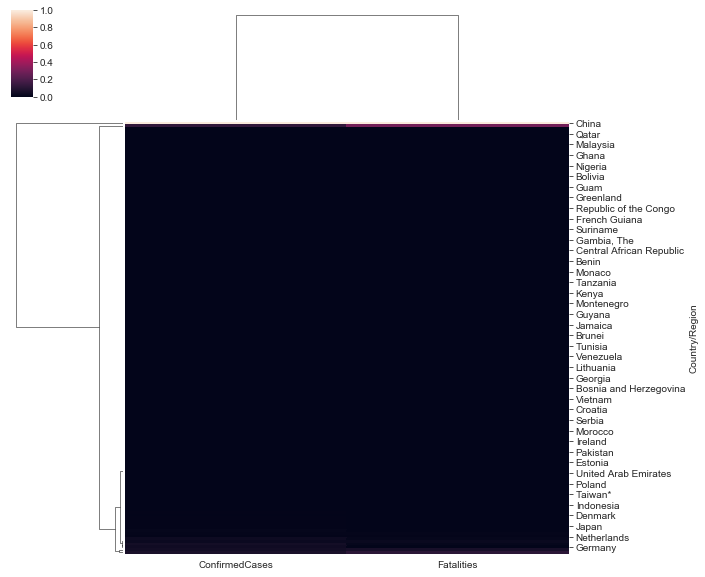

In [101]:
sns.clustermap(countries,standard_scale=1)

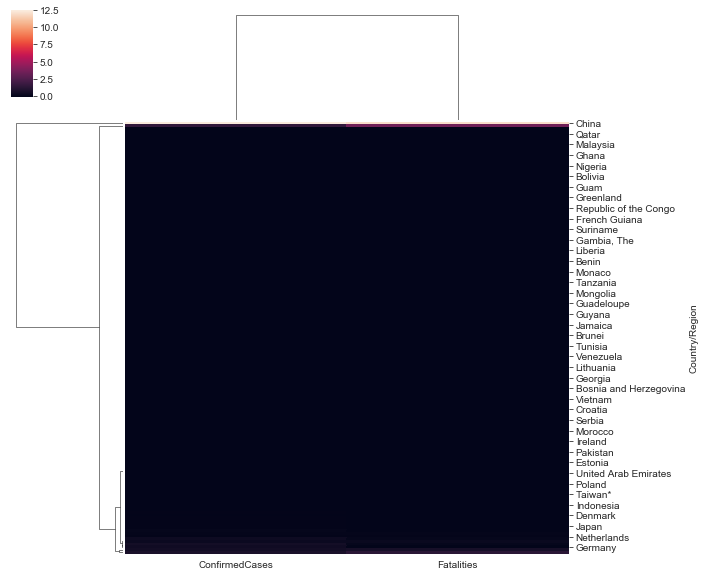

In [108]:
sns.clustermap(countries,z_score=1)

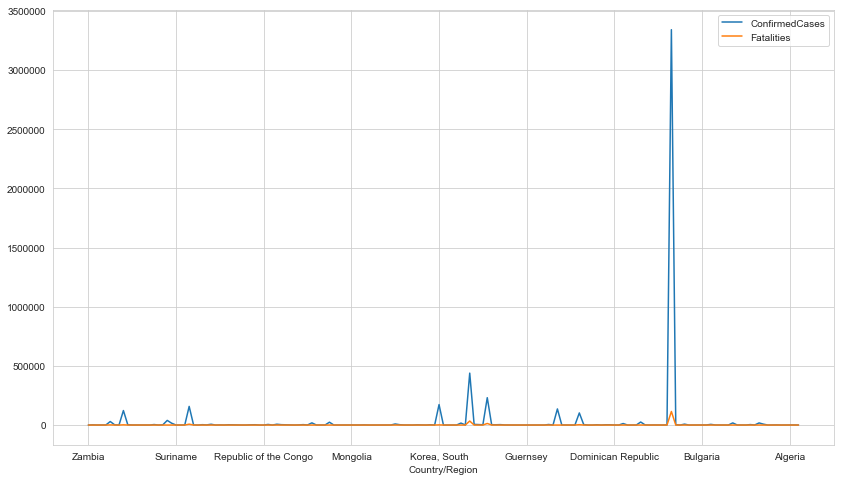

In [121]:
countries.plot(figsize=(14,10))

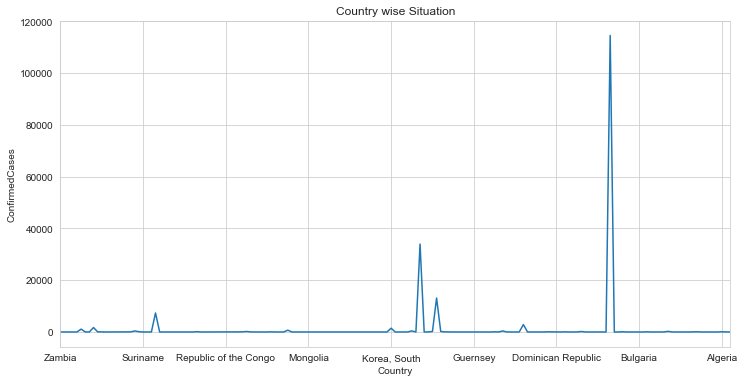

In [114]:
title='Country wise Situation'
ylabel='ConfirmedCases'
xlabel='Country'

ax = countries['Fatalities'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);